The purpose of this notebook is to do some high level analyses on unpaid labor done by women across the world. This is based on data collected by 'The World Bank', and available [here](https://datahub.io/world-bank/sg.tim.uwrk.fe#readme)

According to the website: <i>"The average time women spend on household provision of services for own consumption. Data are expressed as a proportion of time in a day. Domestic and care work includes food preparation, dishwashing, cleaning and upkeep of a dwelling, laundry, ironing, gardening, caring for pets, shopping, installation, servicing and repair of personal and household goods, childcare, and care of the sick, elderly or disabled household members, among others."</i>

In [67]:
%matplotlib inline
import pandas as pd

In [24]:
"""
Directly downloading the data from the site into a csv file because there was an issue with the api
"""

data = pd.read_csv('./data/data_csv.csv')
data.head()

,Country Name,Country Code,Year,Value
0,Albania,ALB,2011,21.74
1,Algeria,DZA,2012,22.08
2,Argentina,ARG,2005,16.74
3,Argentina,ARG,2010,23.75
4,Argentina,ARG,2013,23.68


In [25]:
#Plotting the trend of unpaid labor in a few countries per continent 
countries_NA = ['CAN','USA','MEX']
countries_SA = ['BRA','CRI','ARG']
countries_AUS = ['AUS','NZL']
countries_ASIA = ['IND','MNG','CHN']
countries_EUR = ['GBR','FRA','GER']
countries_AFR = ['DZA','RSA','TUN']

In [26]:
df_na = data[data['Country Code'].isin(countries_NA)]
df_na.head()

,Country Name,Country Code,Year,Value
21,Canada,CAN,2005,15.83
22,Canada,CAN,2010,16.18
85,Mexico,MEX,2002,28.40
86,Mexico,MEX,2009,27.64
87,Mexico,MEX,2014,27.99


In [31]:
df_us = data[data['Country Code']=='USA']
df_us.head()

,Country Name,Country Code,Year,Value
131,United States,USA,2003,16.53
132,United States,USA,2004,16.67
133,United States,USA,2005,16.53
134,United States,USA,2006,16.25
135,United States,USA,2007,16.04


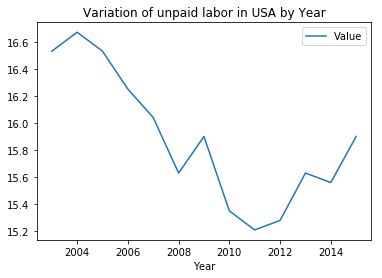

In [28]:
df_us.plot(x='Year',y='Value',title='Variation of unpaid labor in USA by Year')

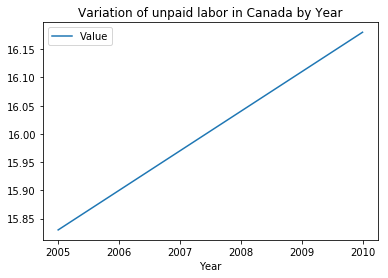

In [29]:
df_na[df_na['Country Code']=='CAN'].plot(x='Year',y='Value',title='Variation of unpaid labor in Canada by Year')

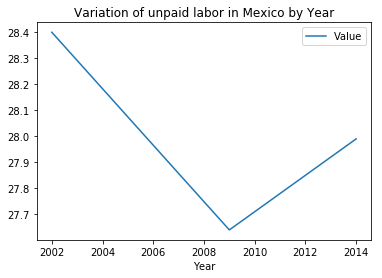

In [30]:
df_na[df_na['Country Code']=='MEX'].plot(x='Year',y='Value',title='Variation of unpaid labor in Mexico by Year')

USA, Canada, and Mexico show some interesting trends, unfortunately the dataset doesn't seem to have data beyond 2014 for Canada. For the sake of sanity, I will look at data from all countries for the year 2014 to start. 

In [52]:
data_2014 = data[data['Year'].isin([2014])]
data_2014.head()

,Country Name,Country Code,Year,Value
43,Greece,GRC,2014,19.17
65,"Korea, Rep.",KOR,2014,14.44
76,Luxembourg,LUX,2014,14.44
87,Mexico,MEX,2014,27.99
124,Tanzania,TZA,2014,16.53


It also makes sense to join this data against GDP data (also made available by the World Bank)

In [34]:
gdp_data = pd.read_csv('./data/core/gdp/data/gdp_csv.csv')
gdp_data.head()

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1968,2.576068e+10
1,Arab World,ARB,1969,2.843420e+10
2,Arab World,ARB,1970,3.138550e+10
3,Arab World,ARB,1971,3.642691e+10
4,Arab World,ARB,1972,4.331606e+10


In [53]:
gdp_data_2014 = gdp_data[gdp_data['Year'].isin([2014])]
gdp_data_2014.head()

,Country Name,Country Code,Year,Value
46,Arab World,ARB,2014,2.906616e+12
103,Caribbean small states,CSS,2014,7.139278e+10
130,Central Europe and the Baltics,CEB,2014,1.463360e+12
187,Early-demographic dividend,EAR,2014,1.052987e+13
244,East Asia & Pacific,EAS,2014,2.190003e+13


In [55]:
#joining unpaid labor data with gdp data for the year 2014
pd_join_1 = pd.merge(data_2014,gdp_data_2014,on=['Country Code','Year','Country Name'])
pd_join_1

,Country Name,Country Code,Year,Value_x,Value_y
0,Greece,GRC,2014,19.17,2.370296e+11
1,"Korea, Rep.",KOR,2014,14.44,1.411334e+12
2,Luxembourg,LUX,2014,14.44,6.632734e+10
3,Mexico,MEX,2014,27.99,1.298461e+12
4,Tanzania,TZA,2014,16.53,4.819722e+10
5,United States,USA,2014,15.56,1.739310e+13


Sadly for the year 2014 we only have so many countries with GDP data. However, I'd like to see a scatter of gdp and unpaid labor to see if there appears to be a relationship for this very limited dataset. 

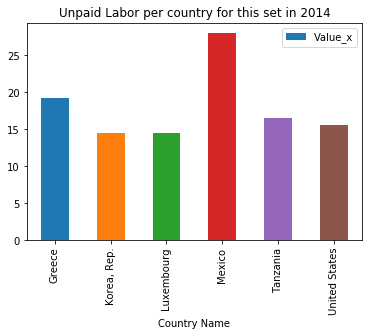

In [64]:
pd_join_1.plot(x='Country Name',y='Value_x',kind='bar',title='Unpaid Labor per country for this set in 2014')

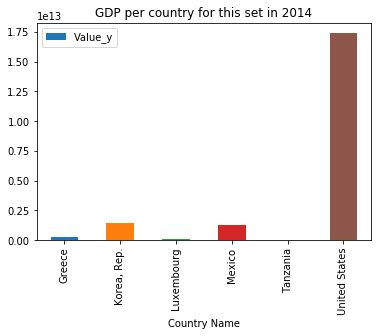

In [65]:
pd_join_1.plot(x='Country Name',y='Value_y',kind='bar',title='GDP per country for this set in 2014')